In [1]:
import pandas as pd
import numpy as np

# Load Data In

In [2]:
#load calendar data
calendar = pd.read_csv('calendar.csv.gz', compression='gzip')

In [3]:
calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,19091,2023-03-09,f,$60.00,$60.00,1.0,1125.0
1,19091,2023-03-10,f,$80.00,$80.00,1.0,1125.0
2,19091,2023-03-11,f,$111.00,$111.00,1.0,1125.0
3,19091,2023-03-12,f,$60.00,$60.00,1.0,1125.0
4,19091,2023-03-13,f,$60.00,$60.00,1.0,1125.0


# Checking missing values in our data

In [4]:
#calendar.sum().isnull() / len(calendar)

# EDA

In [5]:
calendar.describe(include='all')

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
count,2.574386e+06,2574386,2574386,2573271,2573271,2.574380e+06,2.574380e+06
unique,NaN,366,2,4277,4269,NaN,NaN
top,NaN,2024-03-06,f,$150.00,$150.00,NaN,NaN
freq,NaN,7054,1324310,64441,63885,NaN,NaN
mean,2.181939e+17,NaN,NaN,NaN,NaN,1.017839e+01,4.617934e+06
std,3.260054e+17,NaN,NaN,NaN,NaN,1.793390e+01,9.946835e+07
min,1.909100e+04,NaN,NaN,NaN,NaN,1.000000e+00,1.000000e+00
25%,2.337951e+07,NaN,NaN,NaN,NaN,2.000000e+00,3.650000e+02
50%,4.308801e+07,NaN,NaN,NaN,NaN,2.000000e+00,1.125000e+03
75%,5.868368e+17,NaN,NaN,NaN,NaN,2.900000e+01,1.125000e+03


# Market Demand Time Series Analysis

In [6]:
calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,19091,2023-03-09,f,$60.00,$60.00,1.0,1125.0
1,19091,2023-03-10,f,$80.00,$80.00,1.0,1125.0
2,19091,2023-03-11,f,$111.00,$111.00,1.0,1125.0
3,19091,2023-03-12,f,$60.00,$60.00,1.0,1125.0
4,19091,2023-03-13,f,$60.00,$60.00,1.0,1125.0


In [7]:
calendar.tail()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
2574381,900084,2024-03-04,f,"$1,000.00","$1,000.00",30.0,1125.0
2574382,900084,2024-03-05,f,"$1,000.00","$1,000.00",30.0,1125.0
2574383,900084,2024-03-06,f,"$1,000.00","$1,000.00",30.0,1125.0
2574384,900084,2024-03-07,f,"$1,000.00","$1,000.00",30.0,1125.0
2574385,900084,2024-03-08,f,"$1,000.00","$1,000.00",30.0,1125.0


In [8]:
calendar['available'] = calendar['available'].replace(['f', 't'], [0, 1])

In [9]:
calendar['available'].value_counts()

0    1324310
1    1250076
Name: available, dtype: int64

In [10]:
calendar['date'] = pd.to_datetime(calendar.date, format='%Y/%m/%d')

In [11]:
mkt_dem_subset = calendar[calendar['available'] == 0]
mkt_dem_subset['available'].value_counts()

0    1324310
Name: available, dtype: int64

In [12]:
mkt_dem_ts = mkt_dem_subset.groupby('date').available.count()
mkt_dem_ts

date
2023-03-09    3474
2023-03-10    5372
2023-03-11    5668
2023-03-12    5105
2023-03-13    4853
              ... 
2024-03-04    4624
2024-03-05    4621
2024-03-06    4623
2024-03-07    4621
2024-03-08    2029
Name: available, Length: 366, dtype: int64

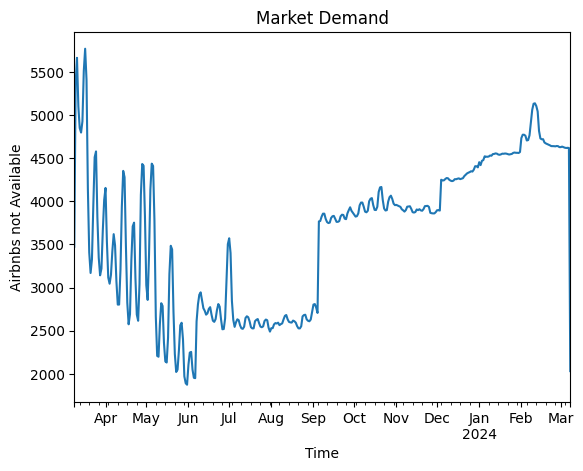

In [13]:
import matplotlib.pylab as plt
%matplotlib inline

ax = mkt_dem_ts.plot()
ax.set_title('Market Demand')
ax.set_xlabel('Time')
ax.set_ylabel('Airbnbs not Available')

plt.show()

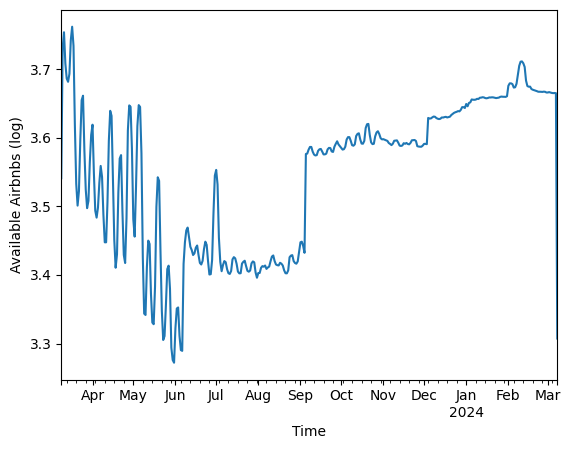

In [14]:
#looking at logarithmic transformation of time series to see of homeostaticity can be achieved 

import numpy as np

mkt_dem_log = np.log10(mkt_dem_ts)

ax = mkt_dem_log.plot()
ax.set_xlabel('Time')
ax.set_ylabel('Available Airbnbs (log)')
plt.show()

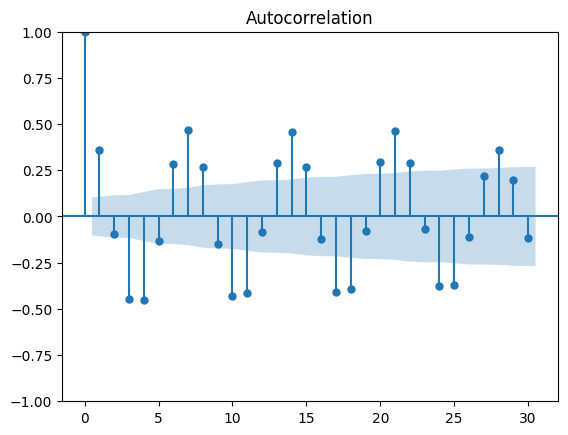

In [15]:
#ACF checks auto correlation in the data to check for seasonality

import statsmodels.tsa.api as smt

#difference looks at diference between two adjacent periods
mkt_dem_log_diff = mkt_dem_log.diff(periods=1)

mkt_dem_log_diff.dropna(inplace=True)

#ACF is auto correlation fraction
#lags = 30 periods
#alpha is significance period
fig = smt.graphics.plot_acf(mkt_dem_log_diff,
                      lags=30,
                      alpha=0.05)

plt.show(fig)

# Time Series Analysis for Market Supply

## Make sure to redefine market supply

In [16]:
nValid = 90
nTrain = len(mkt_dem_ts) - nValid

In [17]:
mktdem_train_ts = mkt_dem_ts[:nTrain]
mktdem_valid_ts = mkt_dem_ts[nTrain:]

In [18]:
mktdem_train_ts

date
2023-03-09    3474
2023-03-10    5372
2023-03-11    5668
2023-03-12    5105
2023-03-13    4853
              ... 
2023-12-05    4244
2023-12-06    4245
2023-12-07    4260
2023-12-08    4272
2023-12-09    4269
Name: available, Length: 276, dtype: int64

In [19]:
mktdem_valid_ts

date
2023-12-10    4251
2023-12-11    4241
2023-12-12    4236
2023-12-13    4241
2023-12-14    4259
              ... 
2024-03-04    4624
2024-03-05    4621
2024-03-06    4623
2024-03-07    4621
2024-03-08    2029
Name: available, Length: 90, dtype: int64

In [20]:
import statsmodels.formula.api as sm
from statsmodels.tsa import tsatools, stattools

mktdem_ts_df = tsatools.add_trend(mkt_dem_ts, trend='ct')
mktdem_ts_df['Day'] = mktdem_ts_df.index.day

In [21]:
mktdem_ts_df

,available,const,trend,Day
date,,,,
2023-03-09,3474,1.0,1.0,9
2023-03-10,5372,1.0,2.0,10
2023-03-11,5668,1.0,3.0,11
2023-03-12,5105,1.0,4.0,12
2023-03-13,4853,1.0,5.0,13
...,...,...,...,...
2024-03-04,4624,1.0,362.0,4
2024-03-05,4621,1.0,363.0,5
2024-03-06,4623,1.0,364.0,6


In [22]:
mktdem_ts_df = mktdem_ts_df.sample(frac=1)
mktdem_ts_df

,available,const,trend,Day
date,,,,
2023-05-22,2227,1.0,75.0,22
2023-05-21,2720,1.0,74.0,21
2023-04-08,3490,1.0,31.0,8
2023-07-16,2608,1.0,130.0,16
2024-02-20,4667,1.0,349.0,20
...,...,...,...,...
2023-05-11,2577,1.0,64.0,11
2023-07-23,2587,1.0,137.0,23
2024-02-04,4763,1.0,333.0,4


# Linear time series model

In [23]:
mktdem_train_df = mktdem_ts_df[:nTrain]
mktdem_valid_df = mktdem_ts_df[nTrain:]

#linear model where the only independent variable is trend
mktdem_lm = sm.ols(formula = 'available~trend', data=mktdem_train_df).fit()

In [24]:
mktdem_train_df['Day'].value_counts()

16    12
20    12
22    11
8     11
26    11
7     11
17    11
18    10
5     10
9     10
30    10
29    10
13     9
19     9
14     9
6      9
27     9
12     9
25     9
2      8
4      8
21     8
15     8
1      8
28     7
11     7
3      7
10     7
24     7
23     5
31     4
Name: Day, dtype: int64

In [25]:
mktdem_valid_df['Day'].value_counts()

23    7
24    5
11    5
10    5
28    5
3     5
4     4
21    4
1     4
15    4
2     4
6     3
19    3
12    3
31    3
27    3
25    3
13    3
14    3
5     2
18    2
9     2
29    2
26    1
30    1
7     1
17    1
8     1
22    1
Name: Day, dtype: int64

In [26]:
mktdem_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              available   R-squared:                       0.442
Model:                            OLS   Adj. R-squared:                  0.440
Method:                 Least Squares   F-statistic:                     217.1
Date:                Sun, 07 May 2023   Prob (F-statistic):           1.37e-36
Time:                        23:22:28   Log-Likelihood:                -2162.2
No. Observations:                 276   AIC:                             4328.
Df Residuals:                     274   BIC:                             4336.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2642.7016     78.079     33.846      0.000    2488.990    2796.413
trend          5.3227      0.361     14.735      0.000       4.612       6.034
==============================================================================
Omnibus:                       70.408   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              232.881
Skew:                           1.072   Prob(JB):                     2.70e-51
Kurtosis:                       6.956   Cond. No.                         457.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
!pip install dmba
from dmba import regressionSummary

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
no display found. Using non-interactive Agg backend


In [28]:
predict_lm = mktdem_lm.predict(mktdem_valid_df)
regressionSummary(mktdem_valid_ts, predict_lm)


Regression statistics

                      Mean Error (ME) : 1030.1846
       Root Mean Squared Error (RMSE) : 1218.9209
            Mean Absolute Error (MAE) : 1050.8457
          Mean Percentage Error (MPE) : 22.2302
Mean Absolute Percentage Error (MAPE) : 23.1016


# Quadratic Model

In [29]:
import numpy as np

mktdem_lm_poly = sm.ols(formula='available ~ trend+np.square(trend)',
                       data = mktdem_train_df).fit()

In [30]:
mktdem_lm_poly.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              available   R-squared:                       0.605
Model:                            OLS   Adj. R-squared:                  0.602
Method:                 Least Squares   F-statistic:                     209.2
Date:                Sun, 07 May 2023   Prob (F-statistic):           8.22e-56
Time:                        23:22:38   Log-Likelihood:                -2114.5
No. Observations:                 276   AIC:                             4235.
Df Residuals:                     273   BIC:                             4246.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         3481.5306    102.824     33.859      0.000    3279.102    3683.959
trend               -7.5439      1.250     -6.037      0.000     -10.004      -5.084
np.square(trend)     0.0345      0.003     10.617      0.000       0.028       0.041
==============================================================================
Omnibus:                       25.431   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               39.388
Skew:                           0.581   Prob(JB):                     2.80e-09
Kurtosis:                       4.440   Cond. No.                     2.02e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.02e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [31]:
predict_lm_poly = mktdem_lm_poly.predict(mktdem_valid_df)
regressionSummary(mktdem_valid_ts, predict_lm_poly)


Regression statistics

                      Mean Error (ME) : 930.1373
       Root Mean Squared Error (RMSE) : 1182.1928
            Mean Absolute Error (MAE) : 1079.1061
          Mean Percentage Error (MPE) : 19.8036
Mean Absolute Percentage Error (MAPE) : 23.9342


# Model using only seasonality

In [32]:
mktdem_lm_season = sm.ols(formula='available ~ C(Day)', data=mktdem_train_df).fit()
mktdem_lm_season.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              available   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                 -0.074
Method:                 Least Squares   F-statistic:                    0.3713
Date:                Sun, 07 May 2023   Prob (F-statistic):              0.999
Time:                        23:22:38   Log-Likelihood:                -2236.6
No. Observations:                 276   AIC:                             4535.
Df Residuals:                     245   BIC:                             4647.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     3549.5000    300.227     11.823      0.000    2958.146    4140.854
C(Day)[T.2]    122.0000    424.584      0.287      0.774    -714.301     958.301
C(Day)[T.3]    247.3571    439.487      0.563      0.574    -618.297    1113.011
C(Day)[T.4]    315.6250    424.584      0.743      0.458    -520.676    1151.926
C(Day)[T.5]    320.7000    402.796      0.796      0.427    -472.685    1114.085
C(Day)[T.6]    391.8333    412.622      0.950      0.343    -420.906    1204.572
C(Day)[T.7]    309.5909    394.575      0.785      0.433    -467.601    1086.783
C(Day)[T.8]     46.6818    394.575      0.118      0.906    -730.510     823.874
C(Day)[T.9]      6.8000    402.796      0.017      0.987    -786.585     800.185
C(Day)[T.10]    21.9286    439.487      0.050      0.960    -843.726     887.583
C(Day)[T.11]   403.2143    439.487      0.917      0.360    -462.440    1268.869
C(Day)[T.12]    56.1667    412.622      0.136      0.892    -756.572     868.906
C(Day)[T.13]   358.0556    412.622      0.868      0.386    -454.683    1170.794
C(Day)[T.14]   202.5000    412.622      0.491      0.624    -610.239    1015.239
C(Day)[T.15]   -35.5000    424.584     -0.084      0.933    -871.801     800.801
C(Day)[T.16]   137.9167    387.591      0.356      0.722    -625.519     901.352
C(Day)[T.17]   -67.3182    394.575     -0.171      0.865    -844.510     709.874
C(Day)[T.18]    63.7000    402.796      0.158      0.874    -729.685     857.085
C(Day)[T.19]   224.2778    412.622      0.544      0.587    -588.461    1037.017
C(Day)[T.20]    54.5833    387.591      0.141      0.888    -708.852     818.019
C(Day)[T.21]  -178.8750    424.584     -0.421      0.674   -1015.176     657.426
C(Day)[T.22]    13.9545    394.575      0.035      0.972    -763.237     791.147
C(Day)[T.23]   196.5000    484.101      0.406      0.685    -757.030    1150.030
C(Day)[T.24]   254.6429    439.487      0.579      0.563    -611.011    1120.297
C(Day)[T.25]  -281.9444    412.622     -0.683      0.495   -1094.683     530.794
C(Day)[T.26]    76.5909    394.575      0.194      0.846    -700.601     853.783
C(Day)[T.27]   153.1667    412.622      0.371      0.711    -659.572     965.906
C(Day)[T.28]   319.0714    439.487      0.726      0.469    -546.583    1184.726
C(Day)[T.29]  -123.7000    402.796     -0.307      0.759    -917.085     669.685
C(Day)[T.30]   -58.6000    402.796     -0.145      0.884    -851.985     734.785
C(Day)[T.31]  -116.2500    520.008     -0.224      0.823   -1140.506     908.006
==============================================================================
Omnibus:                       53.357   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               13.650
Skew:                          -0.212   Prob(JB):                      0.00109
Kurtosis:    

In [33]:
predict_lm_season = mktdem_lm_season.predict(mktdem_valid_df)
regressionSummary(mktdem_valid_ts, predict_lm_season)


Regression statistics

                      Mean Error (ME) : 849.4346
       Root Mean Squared Error (RMSE) : 935.0968
            Mean Absolute Error (MAE) : 888.2074
          Mean Percentage Error (MPE) : 17.9170
Mean Absolute Percentage Error (MAPE) : 19.8279


# Model using seasonality and trend

In [34]:
modelformula = 'available~trend+np.square(trend)+C(Day)'
mktdem_lm_trendseason = sm.ols(formula=modelformula, data=mktdem_train_df).fit()

mktdem_lm_trendseason.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              available   R-squared:                       0.633
Model:                            OLS   Adj. R-squared:                  0.585
Method:                 Least Squares   F-statistic:                     13.11
Date:                Sun, 07 May 2023   Prob (F-statistic):           4.90e-37
Time:                        23:22:38   Log-Likelihood:                -2104.3
No. Observations:                 276   AIC:                             4275.
Df Residuals:                     243   BIC:                             4394.
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         3355.3441    213.495     15.716      0.000    2934.807    3775.881
C(Day)[T.2]         85.0504    264.005      0.322      0.748    -434.980     605.081
C(Day)[T.3]          8.7124    273.960      0.032      0.975    -530.926     548.351
C(Day)[T.4]        175.4844    264.143      0.664      0.507    -344.818     695.787
C(Day)[T.5]        145.1337    250.612      0.579      0.563    -348.516     638.784
C(Day)[T.6]        304.6848    256.612      1.187      0.236    -200.783     810.152
C(Day)[T.7]        170.3467    245.442      0.694      0.488    -313.119     653.812
C(Day)[T.8]        105.1672    245.348      0.429      0.669    -378.113     588.448
C(Day)[T.9]         11.2712    250.717      0.045      0.964    -482.584     505.126
C(Day)[T.10]        72.4980    273.372      0.265      0.791    -465.983     610.979
C(Day)[T.11]       429.9808    273.283      1.573      0.117    -108.325     968.286
C(Day)[T.12]        69.1882    256.599      0.270      0.788    -436.254     574.630
C(Day)[T.13]       397.7199    256.807      1.549      0.123    -108.131     903.571
C(Day)[T.14]       361.9725    256.763      1.410      0.160    -143.792     867.737
C(Day)[T.15]        88.3603    264.069      0.335      0.738    -431.797     608.518
C(Day)[T.16]       172.3478    241.086      0.715      0.475    -302.537     647.233
C(Day)[T.17]       -58.1290    245.335     -0.237      0.813    -541.383     425.125
C(Day)[T.18]        12.4330    250.456      0.050      0.960    -480.909     505.775
C(Day)[T.19]       106.5443    256.620      0.415      0.678    -398.940     612.028
C(Day)[T.20]        69.7286    241.060      0.289      0.773    -405.104     544.562
C(Day)[T.21]       -10.5191    264.337     -0.040      0.968    -531.204     510.165
C(Day)[T.22]        -6.5848    245.340     -0.027      0.979    -489.849     476.679
C(Day)[T.23]        56.7705    301.177      0.188      0.851    -536.481     650.022
C(Day)[T.24]       199.6867    273.281      0.731      0.466    -338.615     737.989
C(Day)[T.25]      -192.1943    256.592     -0.749      0.455    -697.623     313.234
C(Day)[T.26]         9.6296    245.374      0.039      0.969    -473.701     492.960
C(Day)[T.27]        59.5378    256.598      0.232      0.817    -445.903     564.979
C(Day)[T.28]       241.3731    273.477      0.883      0.378    -297.315     780.061
C(Day)[T.29]       -54.8480    250.479     -0.219      0.827    -548.235     438.539
C(Day)[T.30]         4.8708    250.477      0.019      0.985    -488.512     498.254
C(Day)[T.31]      -155.3147    323.691     -0.480      0.632    -792.912     482.283
trend               -7.1103      1.298     -5.478      0.000      -9.667      -4.553
np.square(trend)     0.0335      0.003      9.909      0.000       0.027       0.040
=======================

In [35]:
predict_lm_trendseason = mktdem_lm_trendseason.predict(mktdem_valid_df)
regressionSummary(mktdem_valid_ts, predict_lm_trendseason)


Regression statistics

                      Mean Error (ME) : 917.7386
       Root Mean Squared Error (RMSE) : 1177.9723
            Mean Absolute Error (MAE) : 1082.7921
          Mean Percentage Error (MPE) : 19.5421
Mean Absolute Percentage Error (MAPE) : 24.0275


# SES Models

In [36]:
#looking at moving average
#we pick 30 so we can look at the moving average for the last 30 days (1 month)
ma = mktdem_train_ts.rolling(30).mean()

In [37]:
ma

date
2023-03-09       NaN
2023-03-10       NaN
2023-03-11       NaN
2023-03-12       NaN
2023-03-13       NaN
               ...  
2023-12-05    3924.9
2023-12-06    3936.5
2023-12-07    3949.1
2023-12-08    3961.5
2023-12-09    3972.5
Name: available, Length: 276, dtype: float64

In [38]:
last_ma=ma[-1]

In [39]:
predict_ma = pd.Series(last_ma, index=mktdem_valid_ts.index)
predict_ma

date
2023-12-10    3972.5
2023-12-11    3972.5
2023-12-12    3972.5
2023-12-13    3972.5
2023-12-14    3972.5
               ...  
2024-03-04    3972.5
2024-03-05    3972.5
2024-03-06    3972.5
2024-03-07    3972.5
2024-03-08    3972.5
Length: 90, dtype: float64

In [40]:
regressionSummary(mktdem_valid_ts, predict_ma)


Regression statistics

                      Mean Error (ME) : 563.3111
       Root Mean Squared Error (RMSE) : 654.8542
            Mean Absolute Error (MAE) : 606.5000
          Mean Percentage Error (MPE) : 11.5840
Mean Absolute Percentage Error (MAPE) : 13.7126


In [41]:
from statsmodels.tsa.api import SimpleExpSmoothing

SES = SimpleExpSmoothing(mktdem_train_ts, initialization_method='estimated').fit()
predict_SES = SES.forecast(len(mktdem_valid_ts))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [42]:
SES.model.params

{'smoothing_level': 0.9975844166444531,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 3478.6463257812566,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [43]:
regressionSummary(mktdem_valid_ts, predict_SES)


Regression statistics

                      Mean Error (ME) : 266.8039
       Root Mean Squared Error (RMSE) : 427.4330
            Mean Absolute Error (MAE) : 319.8724
          Mean Percentage Error (MPE) : 4.9846
Mean Absolute Percentage Error (MAPE) : 7.5154


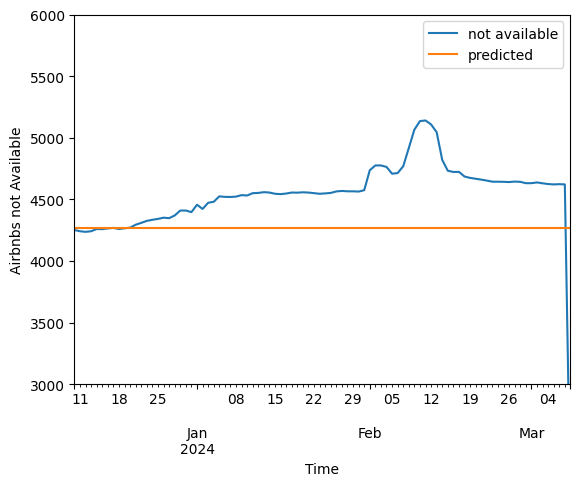

In [57]:
%matplotlib inline

ax = mktdem_valid_ts.plot(label='not available')
ax = predict_SES.plot(label='predicted')
ax.set_xlabel('Time')
ax.set_ylabel('Airbnbs not Available')
ax.set_ylim(3000, 6000)
plt.legend()
plt.show()

In [45]:
mktdem_valid_ts

date
2023-12-10    4251
2023-12-11    4241
2023-12-12    4236
2023-12-13    4241
2023-12-14    4259
              ... 
2024-03-04    4624
2024-03-05    4621
2024-03-06    4623
2024-03-07    4621
2024-03-08    2029
Name: available, Length: 90, dtype: int64

In [46]:
predict_SES

2023-12-10    4269.007177
2023-12-11    4269.007177
2023-12-12    4269.007177
2023-12-13    4269.007177
2023-12-14    4269.007177
                 ...     
2024-03-04    4269.007177
2024-03-05    4269.007177
2024-03-06    4269.007177
2024-03-07    4269.007177
2024-03-08    4269.007177
Freq: D, Length: 90, dtype: float64

# ARIMA models

In [47]:
train_ts_log = mkt_dem_log[:nTrain]
valid_ts_log = mkt_dem_log[nTrain:]

In [48]:
from statsmodels.tsa.stattools import adfuller

print('Results of Dickey-Fuller test')
dftest = adfuller(mkt_dem_log, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p_value', '#lags used', 'Number of observations used'])

for key , value in dftest[4].items():
  dfoutput['Critical Value (%s)' %key] = value

print(dfoutput)

Results of Dickey-Fuller test
Test Statistic                  -1.774482
p_value                          0.393202
#lags used                       9.000000
Number of observations used    356.000000
Critical Value (1%)             -3.448853
Critical Value (5%)             -2.869693
Critical Value (10%)            -2.571114
dtype: float64


In [49]:
import itertools

p = d = q = range(0,2)

pdq = list(itertools.product(p,d,q))

seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p,d,q))]
display(pdq)
display(seasonal_pdq)

[(0, 0, 0),
 (0, 0, 1),
 (0, 1, 0),
 (0, 1, 1),
 (1, 0, 0),
 (1, 0, 1),
 (1, 1, 0),
 (1, 1, 1)]

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12)]

In [50]:
import sys

import warnings
warnings.filterwarnings('ignore')

best_aic = np.inf
best_pdq = None
best_seasonal_pdq = None
temp_model = None

import statsmodels.api as sm

for param in pdq:
    for param_seasonal in seasonal_pdq:

        try:
          temp_model = sm.tsa.statespace.SARIMAX(train_ts_log,
                                                order=param,
                                                seasonal_order=param_seasonal,
                                                enforce_stationarity=True,
                                                enforce_invertibility=True)
      
          results = temp_model.fit()

          if results.aic < best_aic:
            best_aic = results.aic
            best_pdq = param
            best_seasonal_pdq = param_seasonal
    
        except:
          continue

print('Best SARIMAX{}*{}12 model - AIC:{}'.format(best_pdq, best_seasonal_pdq, best_aic))

Best SARIMAX(1, 1, 1)*(1, 0, 1, 12)12 model - AIC:-1154.293091776566


In [51]:
best_model = sm.tsa.statespace.SARIMAX(train_ts_log,
                                       order=(1,1,1),
                                       seasonal_order=(1,0,1,30),
                                       enforce_stationarity=True,
                                       enforce_invertibility=True)

best_results = best_model.fit()

In [52]:
print(best_results.summary().tables[0])
print(best_results.summary().tables[1])

#we ignore sigma

#we need to look at coefficient of ma, it is the coefficient for theta on slide 76


                                     SARIMAX Results                                      
Dep. Variable:                          available   No. Observations:                  276
Model:             SARIMAX(1, 1, 1)x(1, 0, 1, 30)   Log Likelihood                 579.467
Date:                            Sun, 07 May 2023   AIC                          -1148.935
Time:                                    23:23:50   BIC                          -1130.851
Sample:                                03-09-2023   HQIC                         -1141.677
                                     - 12-09-2023                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3039      0.094      3.231      0.001       0.120       0.488
ma.L1          0.3755      0.095   

In [53]:
#predicted numbers here
pred = best_results.get_forecast(steps=90, alpha=0.05)

In [54]:
!pip install dmba

from dmba import regressionSummary

regressionSummary(np.power(10, valid_ts_log),
                  np.power(10, pred.predicted_mean))

#we use the log transformed sales data to build the model so here,
# we need to convert our validation and predicted sales back to their original values from the log transformations

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/

Regression statistics

                      Mean Error (ME) : 377.9603
       Root Mean Squared Error (RMSE) : 526.8227
            Mean Absolute Error (MAE) : 426.9450
          Mean Percentage Error (MPE) : 7.4260
Mean Absolute Percentage Error (MAPE) : 9.7546
